# Soal 1
## Fifa.csv
### Header

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy.stats as stats

from scipy.stats import binom

### Membaca data

In [2]:
data = pd.read_csv('fifa.csv')
data

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

### Deskripsi data
#### Deskripsi data numerik

In [3]:
def mode(x):
    return x.value_counts().index[0]
data.agg({'Age':['min', 'max', 'mean', mode, 'median', 'var', 'std', 'skew', 'kurtosis']})

Age
min       16.000000
max       45.000000
mean      25.122206
mode      21.000000
median    25.000000
var       21.808365
std        4.669943
skew       0.391764
kurtosis  -0.459514

#### Deskripsi data objek

In [4]:
data.describe(include = ['object'])

Name Nationality
count          18207       18207
unique         17194         164
top     J. Rodríguez     England
freq              11        1662

### Boxplot

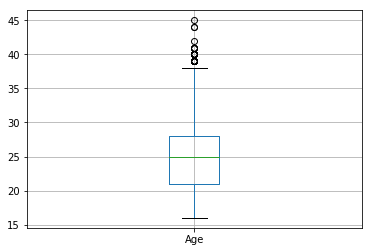

In [5]:
ages = data[['Age']]
ages.boxplot()

### Histogram

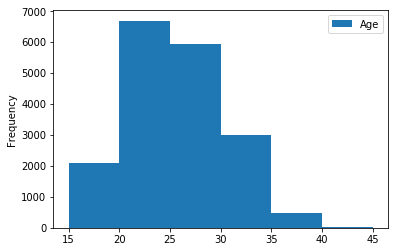

In [6]:
ages.plot(kind = 'hist', bins = [15, 20, 25, 30, 35, 40, 45])

### Fungsi distribusi peluang
#### Fungsi distribusi peluang yang digunakan adalah distribusi hipergeometrik. Tipe distribusi ini dipilih karena peluang memiliki densitas yang semakin besar semakin mendekati rata-rata. Namun, bentuknya tidak terlalu simetris sehingga bentuk tipe distribusi hipergeometrik lebih baik digunakan.

### Jawaban pertanyaan 1-a-i
#### Ekspektasi jumlah pemain berumur kurang dari 22 jika ditambah 1000 data
#### Mencari jumlah pemain dengan umur kurang dari 22, lalu bagi dengan total data, kemudian kalikan dengan 1000. Lalu bulatkan hasilnya.

In [7]:
ages22 = ages[ages < 22].count()
count_row = data.shape[0]
probability = ((ages22 / count_row * 1000).round(0)).astype(np.int64)
probability.rename(index={'Age':'Result'})

Result    261
dtype: int64

### Jawaban pertanyaan 1-a-ii
#### Ekspektasi jumlah pemain berumur lebih dari 40 jika ditambah 1000 data
#### Mencari jumlah pemain dengan umur lebih dari 40, lalu bagi dengan total data, kemudian kalikan dengan 1000. Lalu bulatkan hasilnya

In [8]:
ages40 = ages[ages > 40].count()
probability2 = ((ages40 / count_row * 1000).round(0)).astype(np.int64)
probability2.rename(index={'Age':'Result'})

Result    0
dtype: int64